In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random as rd

In [2]:
# Import the data
data_frame = pd.read_csv('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/MachineLearning/Lab/Lab9/OldFaithfulData.csv')

In [3]:
from mlxtend.preprocessing import standardize
std_df = standardize(data_frame, columns=['eruptions', 'waiting'])

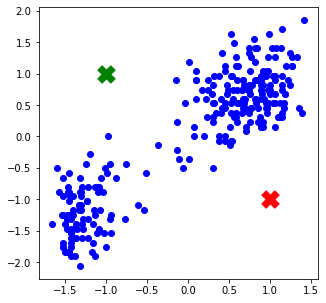

In [4]:
num = 1
J = {}
count = 0
k = 2
centroids = {1:[1,-1],2:[-1,1]}
fig = plt.figure(figsize=(5, 5))
plt.scatter(std_df["eruptions"],std_df["waiting"],color = 'blue')
colmap = {1:'red',2:'green'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i] , marker = 'X' , s = 300)
fig.savefig('plot_{}.png'.format(num), dpi=fig.dpi)  
num+=1
plt.show()

In [ ]:
def assignment(std_df, centroids):
    global count
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        std_df['distance_from_{}'.format(i)] = (np.sqrt((std_df['eruptions'] - centroids[i][0]) ** 2
                                                    + (std_df['waiting'] - centroids[i][1]) ** 2))
    
    error = {count:std_df[["distance_from_1","distance_from_2"]].min(axis = 1).sum()}
    J.update(error)
    count+=1
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    std_df['closest'] = std_df.loc[:, centroid_distance_cols].idxmin(axis=1)
    std_df['closest'] = std_df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    std_df['color'] = std_df['closest'].map(lambda x: colmap[x])
    return std_df

std_df = assignment(std_df, centroids)
print(std_df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(std_df['eruptions'], std_df['waiting'], color=std_df['color'], alpha=0.5)
for i in centroids.keys():
     plt.scatter(*centroids[i], color=colmap[i] ,marker='X',s = 300)
plt.show()
fig.savefig('plot{}.png'.format(num), dpi=fig.dpi)  
num+=1

In [ ]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(std_df[std_df['closest'] == i]['eruptions'])
        centroids[i][1] = np.mean(std_df[std_df['closest'] == i]['waiting'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(std_df['eruptions'], std_df['waiting'], color=std_df['color'], alpha=0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i] , marker = 'X' , s =300)
fig.savefig('plot{}.png'.format(num), dpi=fig.dpi)  
num+=1
plt.show()

In [ ]:
while True:
    closest_centroids = std_df['closest'].copy(deep=True)
    centroids = update(centroids)
    std_df = assignment(std_df, centroids)
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(std_df['eruptions'], std_df['waiting'], color=std_df['color'], alpha=0.5)
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i] , marker = 'X' , s = 300)
    plt.show()
    fig.savefig('plot{}.png'.format(num), dpi=fig.dpi)  
    num+=1
    if closest_centroids.equals(std_df['closest']):
        break

print(std_df)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(list(J.keys()),list(J.values()), color ='green')
plt.scatter(list(J.keys()),list(J.values()))
plt.ylabel("Error")
plt.xlabel("Number of iterations") 
num+=1
plt.show()